In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [144]:
from sklearn.linear_model import LogisticRegression

In [145]:
from sklearn import metrics

In [204]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [250]:
from sklearn.model_selection import RandomizedSearchCV

In [259]:
from sklearn.svm import SVC

In [5]:
students = pd.read_csv('Placement_Data_Full_Class.csv')

In [7]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [9]:
students.drop(labels='sl_no',axis=1,inplace=True)

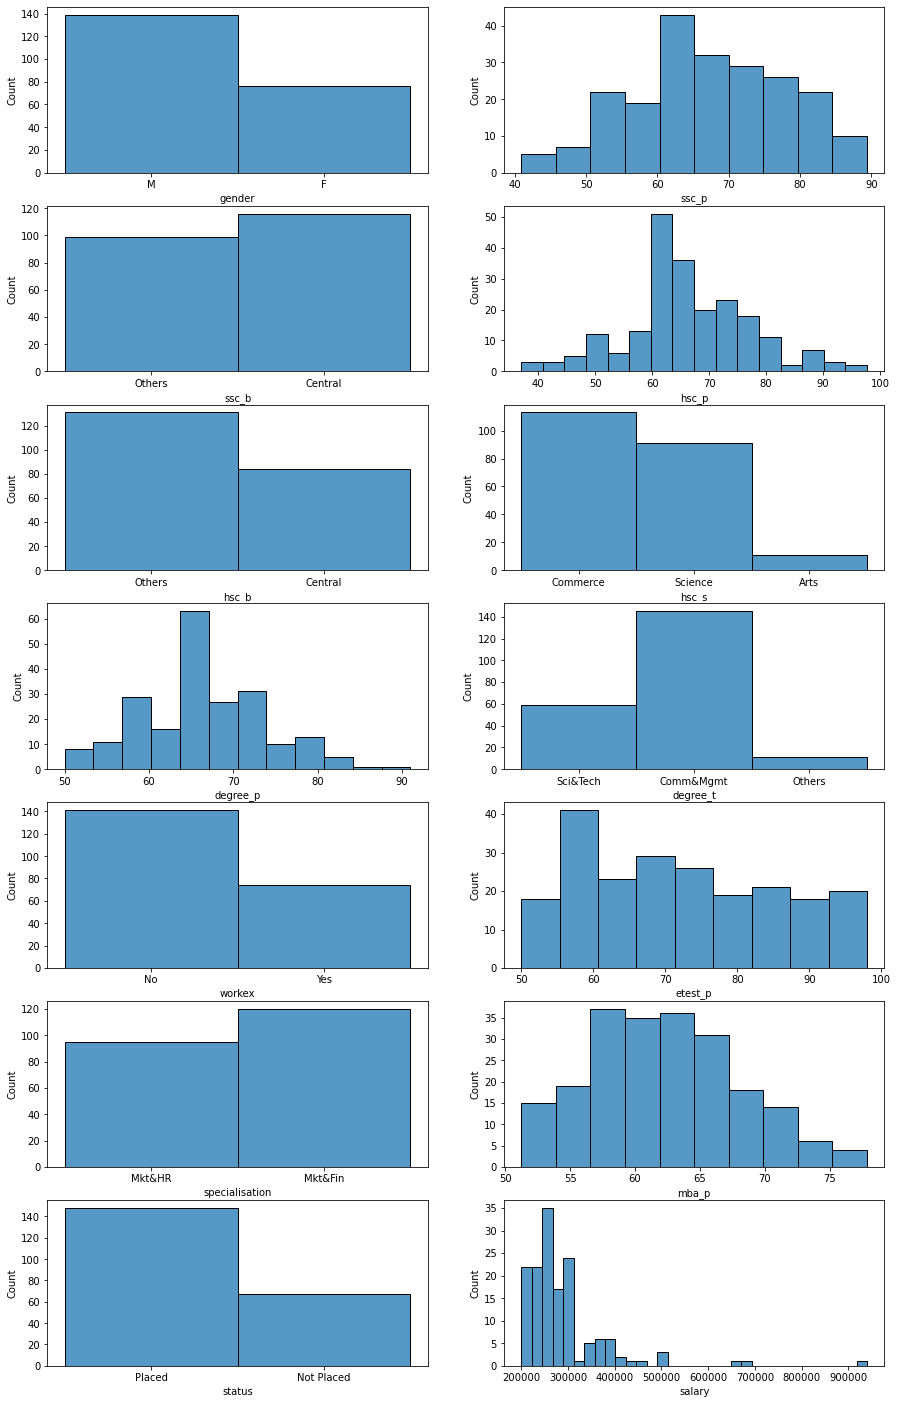

In [21]:
plt.figure(figsize=(15,25))
for i,x in enumerate(students.columns):
    plt.subplot(7,2,i+1)
    sns.histplot(x=students[x])

In [27]:
students.describe()

ssc_p       hsc_p    degree_p     etest_p       mba_p  \
count  215.000000  215.000000  215.000000  215.000000  215.000000   
mean    67.303395   66.333163   66.370186   72.100558   62.278186   
std     10.827205   10.897509    7.358743   13.275956    5.833385   
min     40.890000   37.000000   50.000000   50.000000   51.210000   
25%     60.600000   60.900000   61.000000   60.000000   57.945000   
50%     67.000000   65.000000   66.000000   71.000000   62.000000   
75%     75.700000   73.000000   72.000000   83.500000   66.255000   
max     89.400000   97.700000   91.000000   98.000000   77.890000   

              salary  
count     148.000000  
mean   288655.405405  
std     93457.452420  
min    200000.000000  
25%    240000.000000  
50%    265000.000000  
75%    300000.000000  
max    940000.000000

In [32]:
students[students.salary.isnull()].groupby('status').count()

gender  ssc_p  ssc_b  hsc_p  hsc_b  hsc_s  degree_p  degree_t  \
status                                                                      
Not Placed      67     67     67     67     67     67        67        67   

            workex  etest_p  specialisation  mba_p  salary  
status                                                      
Not Placed      67       67              67     67       0

In [34]:
students[students.salary.isnull()==False].groupby('status').count()

gender  ssc_p  ssc_b  hsc_p  hsc_b  hsc_s  degree_p  degree_t  workex  \
status                                                                          
Placed     148    148    148    148    148    148       148       148     148   

        etest_p  specialisation  mba_p  salary  
status                                          
Placed      148             148    148     148

##### Zmienna salary przyjmuje wartości wyłącznie w przypadku studentów przyjętych, więc nie dodaje wartości wyjaśniającej

In [35]:
students.drop(labels='salary',axis=1,inplace=True)

In [38]:
x = students.iloc[:,:-1]

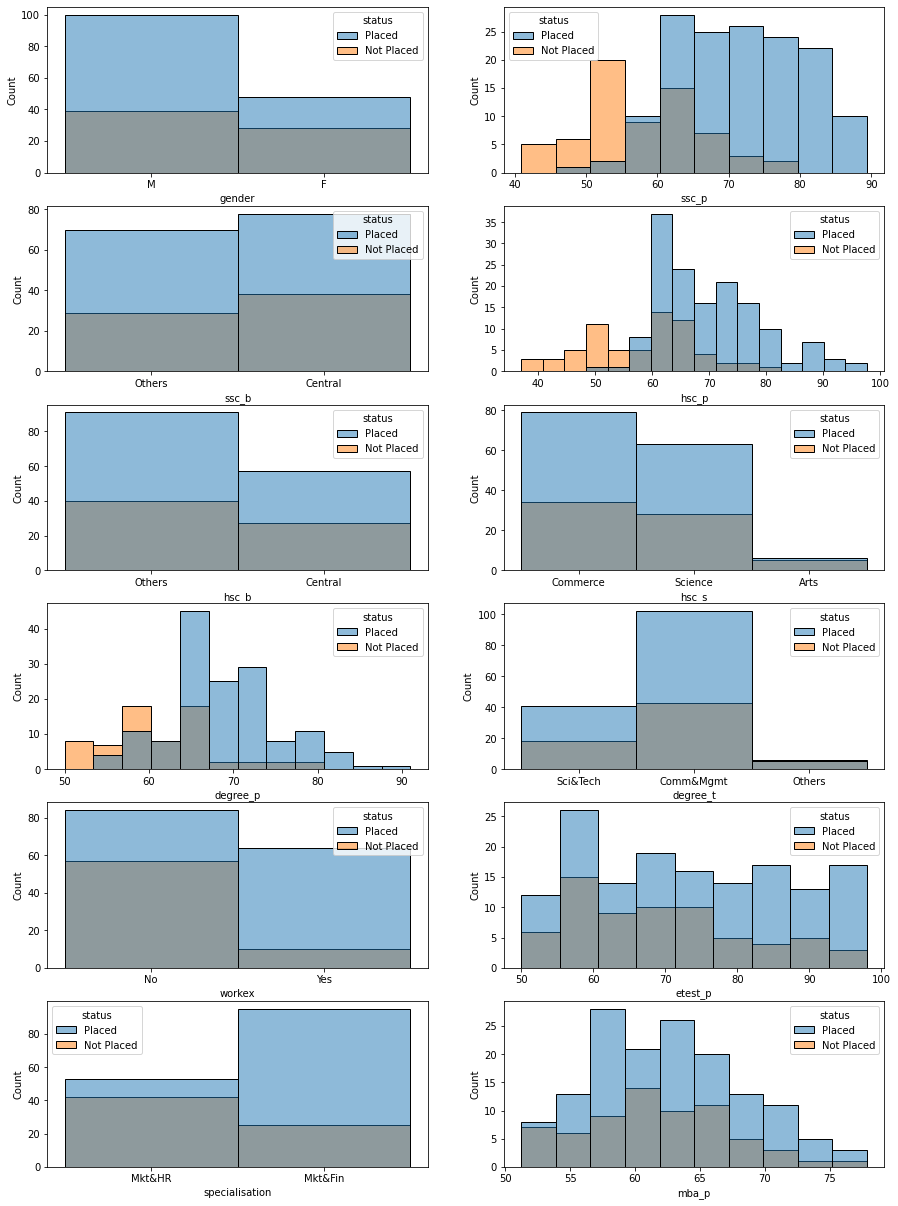

In [39]:
plt.figure(figsize=(15,25))
for i,a in enumerate(x.columns):
    plt.subplot(7,2,i+1)
    sns.histplot(x=students[a],hue=students.status)

In [40]:
students.columns

Index(['gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p',
       'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p', 'status'],
      dtype='object')

In [41]:
cat_var_lab = ['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation', 'status']

In [43]:
stud_dumm = pd.get_dummies(students, columns=cat_var_lab)

In [44]:
stud_dumm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ssc_p                   215 non-null    float64
 1   hsc_p                   215 non-null    float64
 2   degree_p                215 non-null    float64
 3   etest_p                 215 non-null    float64
 4   mba_p                   215 non-null    float64
 5   gender_F                215 non-null    uint8  
 6   gender_M                215 non-null    uint8  
 7   ssc_b_Central           215 non-null    uint8  
 8   ssc_b_Others            215 non-null    uint8  
 9   hsc_b_Central           215 non-null    uint8  
 10  hsc_b_Others            215 non-null    uint8  
 11  hsc_s_Arts              215 non-null    uint8  
 12  hsc_s_Commerce          215 non-null    uint8  
 13  hsc_s_Science           215 non-null    uint8  
 14  degree_t_Comm&Mgmt      215 non-null    ui

In [45]:
stud_dumm.drop(axis=1,inplace=True, labels=['gender_F','ssc_b_Others','hsc_b_Others','degree_t_Others','workex_No','status_Not Placed'] )

In [59]:
stud_dumm.columns

Index(['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'gender_M',
       'ssc_b_Central', 'hsc_b_Central', 'hsc_s_Arts', 'hsc_s_Commerce',
       'hsc_s_Science', 'degree_t_Comm&Mgmt', 'degree_t_Sci&Tech',
       'workex_Yes', 'specialisation_Mkt&Fin', 'specialisation_Mkt&HR',
       'status_Placed'],
      dtype='object')

In [46]:
stud_dumm

ssc_p  hsc_p  degree_p  etest_p  mba_p  gender_M  ssc_b_Central  \
0    67.00  91.00     58.00     55.0  58.80         1              0   
1    79.33  78.33     77.48     86.5  66.28         1              1   
2    65.00  68.00     64.00     75.0  57.80         1              1   
3    56.00  52.00     52.00     66.0  59.43         1              1   
4    85.80  73.60     73.30     96.8  55.50         1              1   
..     ...    ...       ...      ...    ...       ...            ...   
210  80.60  82.00     77.60     91.0  74.49         1              0   
211  58.00  60.00     72.00     74.0  53.62         1              0   
212  67.00  67.00     73.00     59.0  69.72         1              0   
213  74.00  66.00     58.00     70.0  60.23         0              0   
214  62.00  58.00     53.00     89.0  60.22         1              1   

     hsc_b_Central  hsc_s_Arts  hsc_s_Commerce  hsc_s_Science  \
0                0           0               1              0   
1                0           0               0              1   
2                1           1               0              0   
3                1           0               0              1   
4                1           0               1              0   
..             ...         ...             ...            ...   
210              0           0               1              0   
211              0           0               0              1   
212              0           0               1              0   
213              0           0               1              0   
214              0           0               0              1   

     degree_t_Comm&Mgmt  degree_t_Sci&Tech  workex_Yes  \
0                     0                  1           0   
1                     0                  1           1   
2                     1                  0           0   
3                     0                  1           0   
4                     1                  0           0   
..                  ...                ...         ...   
210                   1                  0           0   
211                   0                  1           0   
212                   1                  0           1   
213                   1                  0           0   
214                   1                  0           0   

     specialisation_Mkt&Fin  specialisation_Mkt&HR  status_Placed  
0                         0                      1              1  
1                         1                      0              1  
2                         1                      0              1  
3                         0                      1              0  
4                         1                      0              1  
..                      ...                    ...            ...  
210                       1                      0              1  
211                       1                      0              1  
212                       1                      0              1  
213                       0                      1              1  
214                       0                      1              0  

[215 rows x 17 columns]

In [62]:
x_cat_y = ['gender_M','ssc_b_Central', 'hsc_b_Central', 'hsc_s_Arts', 'hsc_s_Commerce','hsc_s_Science', 'degree_t_Comm&Mgmt', 'degree_t_Sci&Tech','workex_Yes', 'specialisation_Mkt&Fin', 'specialisation_Mkt&HR','status_Placed']
x_num_y = ['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p','status_Placed']

<AxesSubplot:>

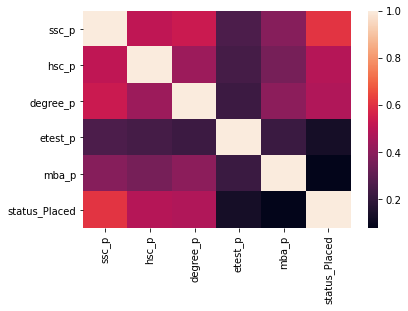

In [63]:
sns.heatmap(stud_dumm[x_num_y].corr())

In [64]:
np.abs(stud_dumm[x_num_y].corr().status_Placed).sort_values(ascending=False)

status_Placed    1.000000
ssc_p            0.607889
hsc_p            0.491228
degree_p         0.479861
etest_p          0.127639
mba_p            0.076922
Name: status_Placed, dtype: float64

In [56]:
x_col = stud_dumm.iloc[:,:-1].columns

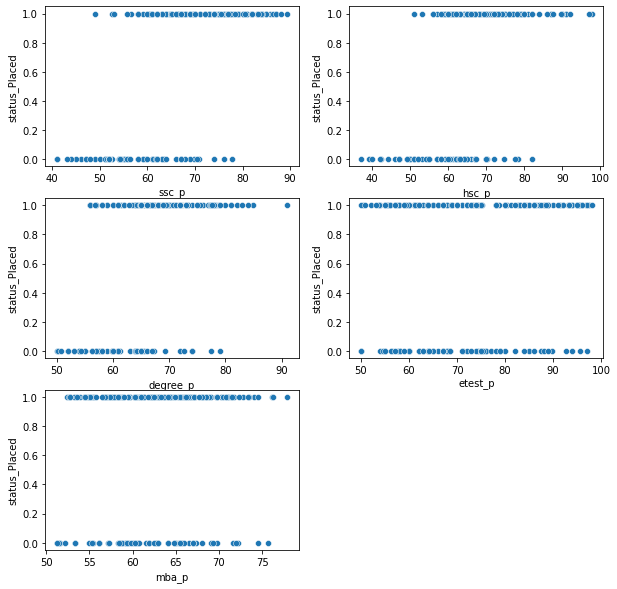

In [66]:
plt.figure(figsize=(10,10))
for i,a in enumerate(x_num_y[:-1]):
    plt.subplot(3,2,i+1)
    sns.scatterplot(x=stud_dumm[x_num_y][a],y=stud_dumm[x_num_y].status_Placed)

#### Wśród zmiennych numerycznych największy wpływ na przyjęcie na studia ma wynik procentowy uzyskany na egzaminie po secondary education. Najmniejszy wpływ mają wyniki egzaminu MBA oraz testu zdolności do zatrudnienia. Średni wpływ mają wyniki egzaminów po high secondary education oraz wyniki egzaminu degree.

In [142]:
for i in [x_cat_y][0][:-1]:
    print(stud_dumm[x_cat_y].groupby(['status_Placed',i])['status_Placed'].count()/stud_dumm[x_cat_y].groupby('status_Placed')['status_Placed'].count())

status_Placed  gender_M
0              0           0.417910
               1           0.582090
1              0           0.324324
               1           0.675676
Name: status_Placed, dtype: float64
status_Placed  ssc_b_Central
0              0                0.432836
               1                0.567164
1              0                0.472973
               1                0.527027
Name: status_Placed, dtype: float64
status_Placed  hsc_b_Central
0              0                0.597015
               1                0.402985
1              0                0.614865
               1                0.385135
Name: status_Placed, dtype: float64
status_Placed  hsc_s_Arts
0              0             0.925373
               1             0.074627
1              0             0.959459
               1             0.040541
Name: status_Placed, dtype: float64
status_Placed  hsc_s_Commerce
0              0                 0.492537
               1                 0.507463
1         

#### Wśród zmiennych kategorycznych czynnikami najsilniej różnicującymi przyjęcie na studia są doświadczenie zawodowe oraz specjalizacja MBA. Najbardziej pożądaną specjalizacją jest marketing i finanse - wśród osób przyjętych aż 64% osób miało taką specjalność 

In [152]:
x = stud_dumm.iloc[:,:-1]
y = stud_dumm.status_Placed

In [154]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

#### Regresja logistyczna

In [159]:
log_reg = LogisticRegression(max_iter=1000)

In [160]:
log_reg.fit(x_train,y_train)
log_reg.score(x_test,y_test)

0.813953488372093

In [162]:
print(metrics.classification_report(y_test,log_reg.predict(x_test)))

              precision    recall  f1-score   support

           0       0.79      0.69      0.73        16
           1       0.83      0.89      0.86        27

    accuracy                           0.81        43
   macro avg       0.81      0.79      0.80        43
weighted avg       0.81      0.81      0.81        43



In [180]:
coef = pd.Series(log_reg.coef_[0], name='Coef')

In [182]:
variables = pd.Series(x_train.columns, name='Variable')

In [184]:
df_variable = pd.merge(variables,coef,left_index=True, right_index=True)

In [187]:
df_variable.index = df_variable.Variable

<AxesSubplot:ylabel='Variable'>

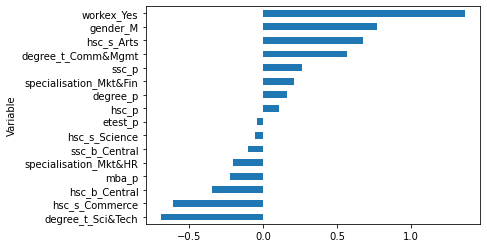

In [199]:
df_variable.Coef.sort_values().plot.barh()

#### Drzewo decyzyjne

In [223]:
dt = tree.DecisionTreeClassifier(max_depth= 4)

In [224]:
dt.fit(x_train,y_train)
dt.score(x_test,y_test)

0.6976744186046512

[Text(178.56, 195.696, 'X[0] <= 59.8\ngini = 0.417\nsamples = 172\nvalue = [51, 121]'),
 Text(111.6, 152.208, 'X[0] <= 57.14\ngini = 0.193\nsamples = 37\nvalue = [33, 4]'),
 Text(44.64, 108.72, 'X[2] <= 70.655\ngini = 0.064\nsamples = 30\nvalue = [29, 1]'),
 Text(22.32, 65.232, 'gini = 0.0\nsamples = 28\nvalue = [28, 0]'),
 Text(66.96000000000001, 65.232, 'X[12] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(44.64, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(89.28, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(178.56, 108.72, 'X[3] <= 67.5\ngini = 0.49\nsamples = 7\nvalue = [4, 3]'),
 Text(156.24, 65.232, 'X[1] <= 66.0\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(133.92000000000002, 21.744, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(178.56, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(200.88, 65.232, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(245.52, 152.208, 'X[2] <= 55.19\ngini = 0.231\nsamples = 135\nvalue = [18, 

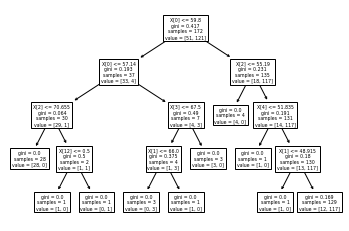

In [225]:
tree.plot_tree(dt)

In [228]:
print(metrics.classification_report(y_test,dt.predict(x_test)))

              precision    recall  f1-score   support

           0       0.62      0.50      0.55        16
           1       0.73      0.81      0.77        27

    accuracy                           0.70        43
   macro avg       0.67      0.66      0.66        43
weighted avg       0.69      0.70      0.69        43



#### Las losowy 

In [248]:
ran_for = RandomForestClassifier(n_estimators=100,max_features=2,min_samples_leaf=7)

In [249]:
ran_for.fit(x_train,y_train)
ran_for.score(x_test,y_test)

0.6744186046511628

In [252]:
hyper_param = {'n_estimators':[100,200,400,600,1000], 'min_samples_leaf': [1,3,5,10], 'max_depth': [1,4,8], 'max_features': ['auto', 'sqrt', 'log2', 1, 3]}

In [255]:
ran_se = RandomizedSearchCV(RandomForestClassifier(),hyper_param,n_jobs=-1, cv=3,verbose=2, n_iter = 100)

In [256]:
ran_se.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   45.1s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.7min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [1, 4, 8],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         1, 3],
                                        'min_samples_leaf': [1, 3, 5, 10],
                                        'n_estimators': [100, 200, 400, 600,
                                                         1000]},
                   verbose=2)

In [257]:
ran_se.score(x_test,y_test)

0.6976744186046512

In [258]:
ran_se.best_params_

{'n_estimators': 100,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 8}

### Support vector classifier

In [260]:
svc = SVC()

In [262]:
svc.fit(x_train,y_train)
svc.score(x_test,y_test)

0.7441860465116279

In [265]:
print(metrics.classification_report(y_test,svc.predict(x_test)))

              precision    recall  f1-score   support

           0       0.86      0.38      0.52        16
           1       0.72      0.96      0.83        27

    accuracy                           0.74        43
   macro avg       0.79      0.67      0.67        43
weighted avg       0.77      0.74      0.71        43

